In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load needed data and drop unneeded "Unnamed: 0" column
sighting_data_frame = pd.read_csv("timedata.csv")
sighting_data_frame = sighting_data_frame.drop(["Unnamed: 0"], axis=1)
display(sighting_data_frame.head())

,city,state,year,month,day,hour,minute,converted_timestamp
0,Chester,VA,2019,12,12,18,43,2019-12-12 18:43:00
1,Rocky Hill,CT,2019,3,22,18,30,2019-03-22 18:30:00
2,Kirbyville,TX,2019,4,2,20,25,2019-04-02 20:25:00
3,Gold Canyon,AZ,2019,4,10,17,0,2019-04-10 17:00:00
4,Dallas,TX,1973,7,14,22,0,1973-07-14 22:00:00


In [7]:
# Create a new dataframe with the two columns we'll be using to answer our question
sighting_freq = sighting_data_frame[["month","hour"]]
display(sighting_freq.head())

,month,hour
0,12,18
1,3,18
2,4,20
3,4,17
4,7,22


In [9]:
# Create a new column to store the month names mapped onto the "month" column
sighting_freq["Month Name"] = sighting_freq["month"].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})
sighting_freq = sighting_freq.sort_values("month").reset_index(drop=True)
display(sighting_freq.head())

,month,hour,Month Name
0,1,23,January
1,1,5,January
2,1,1,January
3,1,17,January
4,1,22,January


In [14]:
# Create a new dataframe for just the data related to sightings per month

# Get the number of sightings per month
monthdf = pd.DataFrame(sighting_freq["Month Name"].value_counts()).reset_index()
monthdf = monthdf.rename(columns={"Month Name":"count", "index":"Month Name"})

# Use pd.merge() to merge monthdf with sighting_freq, keep only the columns related to sightings per month
monthfinal = pd.merge(monthdf, sighting_freq, how="left", on="Month Name")
monthfinal = monthfinal.drop("hour",axis=1)
monthfinal = monthfinal.drop_duplicates()
monthfinal = monthfinal.sort_values(by="month")
display(monthfinal.head())

,Month Name,count,month
45432,January,4124,1
57442,February,3197,2
53569,March,3873,3
49556,April,4013,4
41282,May,4150,5


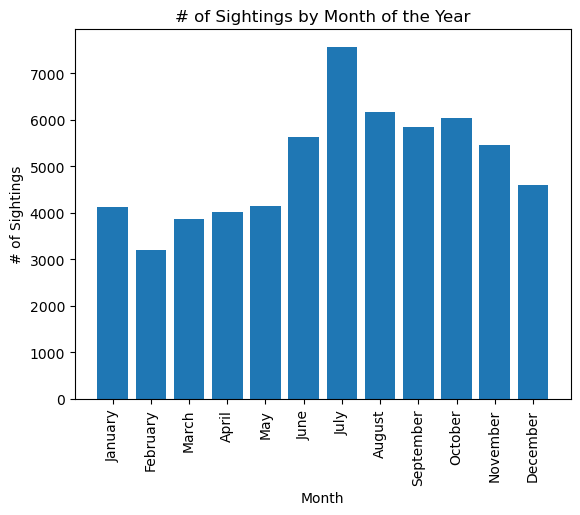

In [16]:
# Create a bar chart to show number of sightings by month of the year
plt.bar(monthfinal["Month Name"],monthfinal["count"])
plt.title("# of Sightings by Month of the Year")
plt.xlabel("Month")
plt.ylabel("# of Sightings")
plt.xticks(rotation = 90)
plt.show()

In [23]:
# Create a new dataframe for just the data related to sightings by hour of the day
hourdf = pd.DataFrame(sighting_freq["hour"].value_counts()).reset_index()
hourdf = hourdf.rename(columns={"hour":"count", "index":"hour"})
hourdf = hourdf.sort_values("hour").reset_index(drop=True)
display(hourdf.head())

,hour,count
0,0,3451
1,1,2174
2,2,1428
3,3,1336
4,4,1097


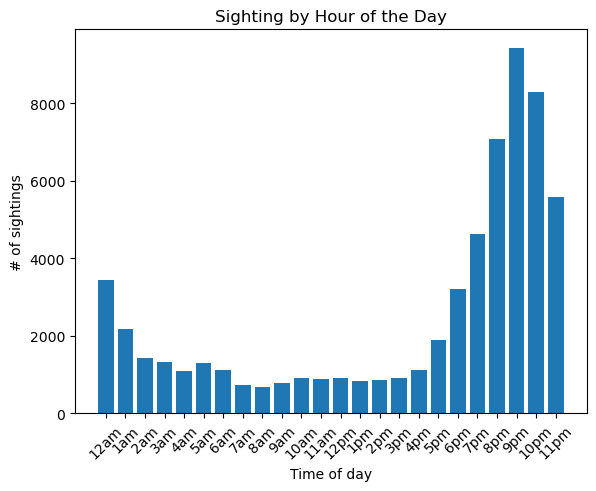

In [24]:
# Create a bar chart to show the number of sightings by the hour of day they occured
fig = plt.figure()
ax= fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.bar(hourdf["hour"].unique(),hourdf["count"])
plt.title("Sighting by Hour of the Day")
plt.xlabel("Time of day")
plt.ylabel("# of sightings")
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
ax.set_xticklabels(["12am","1am","2am","3am","4am","5am","6am","7am","8am","9am","10am","11am","12pm","1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"])
plt.xticks(rotation=45)
plt.show()